# Games and Argumentation: Time for a Family Reunion!

This notebook aims to demonstrate the paper "Game and Argumentation: Time for a Family Reunion" accepted by XLoKR 2023. 

**Import Functions** <br>
Let's import functions for later usage

In [1]:
from vanilla_functions import *
import ipywidgets as widgets
from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Section 1: All Start from a Graph

Imagine that we have a graph $G = (V, E)$ and here are the edges

In [2]:
%%file files/plain_graph.dlv
edge(b,a).
edge(b,t).
edge(c,b).
edge(d,c).
edge(e,b).
edge(e,d).
edge(f,b).
edge(g,s).
edge(h,f).
edge(i,e).
edge(j,i).
edge(k,i).
edge(l,i).
edge(m,e).
edge(m,o).
edge(m,n).
edge(n,j).
edge(o,i).
edge(o,m).
edge(q,g).
edge(q,h).
edge(q,c).
edge(s,e).
edge(s,f).
edge(t,s).
edge(u,t).
edge(v,b).
edge(v,u).
edge(w,b).
edge(x,d).
edge(y,b).
edge(z,c).

Overwriting files/plain_graph.dlv


Suppose the predicate $edge(X,Y)$ means a directed edge from $X$ to $Y$, we can easily get the graph below

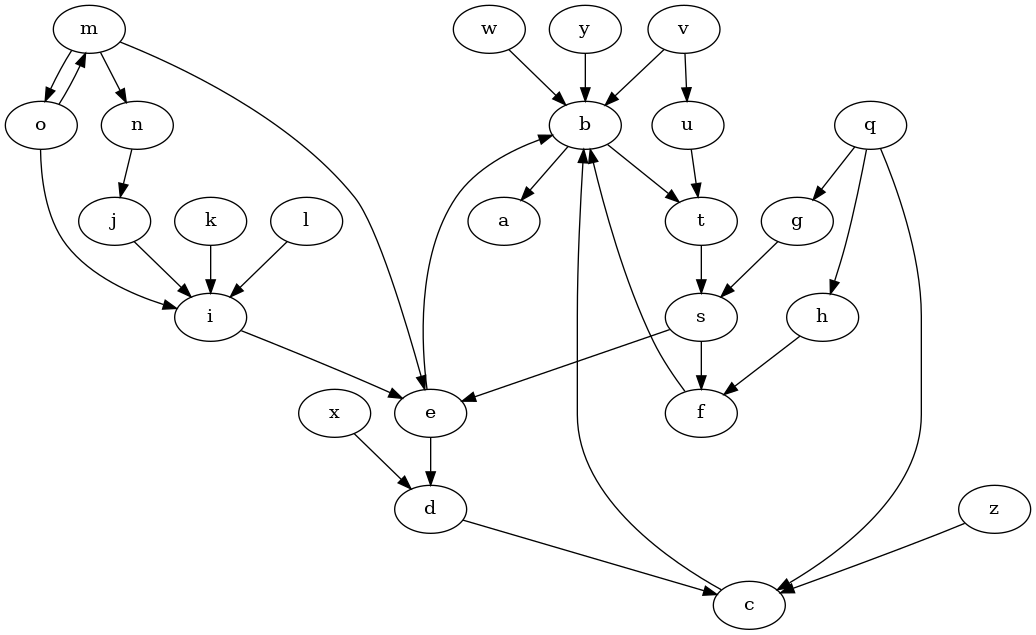

In [3]:
# visualize_file (input_file_address, predicate_name, output_filename)
visualize_file("files/plain_graph.dlv","edge","plain_graph") # adjust the predicate name accordingly
Image("output/plain_graph.png")

## Section 2: Kernel

### 2.1 Graph Kernels

Because `e(X,Y) :- edge(X,Y).`, the graph for kernel calculation will be the same as the plain graph we have drawn previously.

In [4]:
%%file files/plain_to_kernel.dlv

e(X,Y):- edge(X,Y).

Overwriting files/plain_to_kernel.dlv


### 2.2 Calculate Kernel

Based on [Combinatorial Game Theory Foundations Applied to Digraph Kernels](https://www.combinatorics.org/ojs/index.php/eljc/article/view/v4i2r10) by Dr.Fraenkel, we know that Kernel is both indepedent and dominating, which can be defined as 

In [5]:
%%file files/cal_kernel.dlv

% c represents complements of kernels
% k stands for kernel
% pk means possibly in or out of kernel

% Positions
pos(X) :- e(X,_).
pos(X) :- e(_,X).

% Kernel rules
c(X) :- e(X,Y), k(Y).         % X is in the kernel complement if there is an edge from X into the kernel (to Y)
k(X) :- pos(X), not c(X).
pk(X) :- pos(X), not c(X), not k(X).

Overwriting files/cal_kernel.dlv


with the graph and reasoning script, we can get the status of nodes 

In [6]:
cmd_solve = 'dlv files/plain_graph.dlv files/plain_to_kernel.dlv files/cal_kernel.dlv -wf'
kernel_nodes_status = get_nodes_status(run_command(cmd_solve),node_types=["c","k","pk"])

In [7]:
kernel_nodes_status

{'c': ['b', 'd', 's', 'h', 'i', 'm', 'n', 'q', 'u', 'z'],
 'k': ['a', 't', 'c', 'e', 'f', 'g', 'j', 'k', 'l', 'o', 'v', 'w', 'x', 'y'],
 'pk': []}

### 2.3 Visualization Schema - Kernel

In [8]:
kernel_node_color = {'k': 'black', 'c': 'white', 'pk': 'gray'}
kernel_edge_color = {
        ('white', 'white'): 'gray',
        ('white', 'gray'): 'gray',
        ('gray', 'white'): 'gray',
        ('gray', 'gray'): 'dark_yellow',
        ('white', 'black'): 'dark_gray',
        ('black', 'white'): 'black'
    }

### 2.4 Colored Kernel Decomposition Graph

With the node status and the visualization schema we defined, we can start to color the graph

In [9]:
color_graph("output/plain_graph.dot", "kernel",kernel_nodes_status, kernel_node_color, kernel_edge_color)

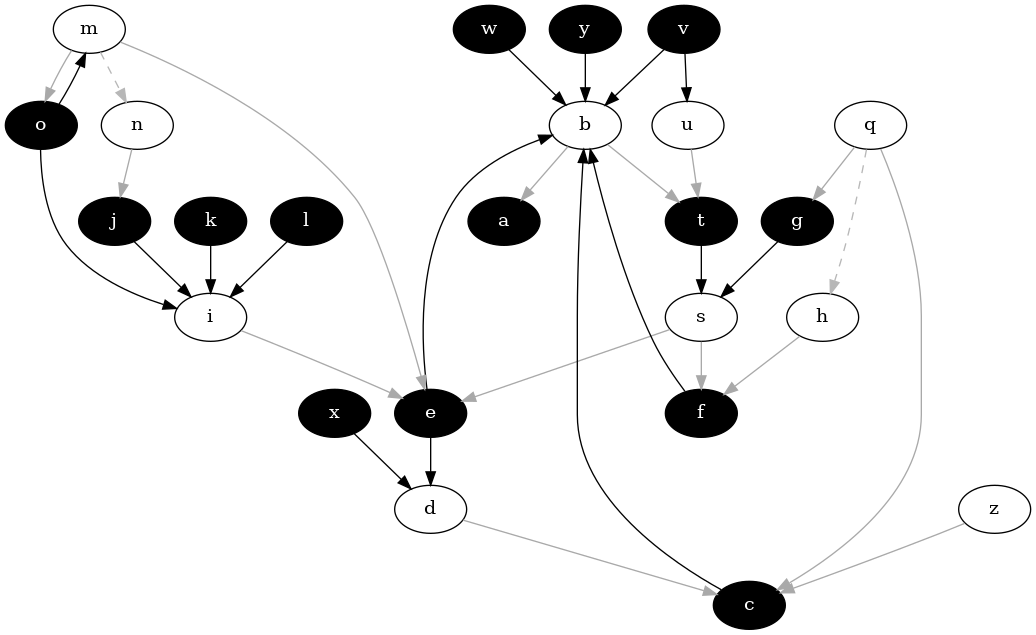

In [10]:
Image("output/kernel_graph_colored.png")

## Section 3: Game

### 3.1 Move Graph

Okie, let's introduce the move graph, with a simple rule $move(X,Y):- \, edge(X,Y)$, we can get the move graph

In [11]:
%%file files/plain_to_move.dlv

move(X,Y):- edge(X,Y).

Overwriting files/plain_to_move.dlv


### 3.2 Solve the Game

Based on the <br>
$win(X) ← move(X, Y ), ¬ win(Y ).$ <br>
$lost(X) ←  ¬ win(X).$ <br>

we can solve this move graph

In [12]:
%%file files/sol_game.dlv

% Positions
pos(X) :- move(X,_).
pos(X) :- move(_,X).

% Win_Move
win(X) :- move(X,Y),not win(Y).
lost(X) :- pos(X), not win(X).
drawn(X) :- pos(X), not win(X), not lost(X).

Overwriting files/sol_game.dlv


In [13]:
cmd = 'dlv files/plain_graph.dlv files/plain_to_move.dlv files/sol_game.dlv -wf'
game_nodes_status = get_nodes_status(run_command(cmd),node_types=["win","lost","drawn"])

In [14]:
game_nodes_status

{'win': ['b', 's', 'd', 'h', 'i', 'm', 'n', 'q', 'u', 'z'],
 'lost': ['a',
  't',
  'c',
  'e',
  'f',
  'g',
  'j',
  'k',
  'l',
  'o',
  'v',
  'w',
  'x',
  'y'],
 'drawn': []}

### 3.3 Visualization Schema - Game

Suppose we aim to assign colors to the move graph according to the node status. Nodes labeled as $win$ will be colored green, those with a $lost$ status will be colored red, and if they're identified as drawn, they'll be colored yellow.

In [15]:
game_node_color = {'win': 'green', 'lost': 'red', 'drawn': 'yellow'}
game_edge_color = {
        ('green', 'green'): 'gray',
        ('green', 'yellow'): 'gray',
        ('yellow', 'green'): 'gray',
        ('yellow', 'yellow'): 'yellow',
        ('green', 'red'): 'green',
        ('red', 'green'): 'red'
    }

### 3.4 Colored Move Graph

In [16]:
color_graph("output/plain_graph.dot","game", game_nodes_status, game_node_color, game_edge_color)

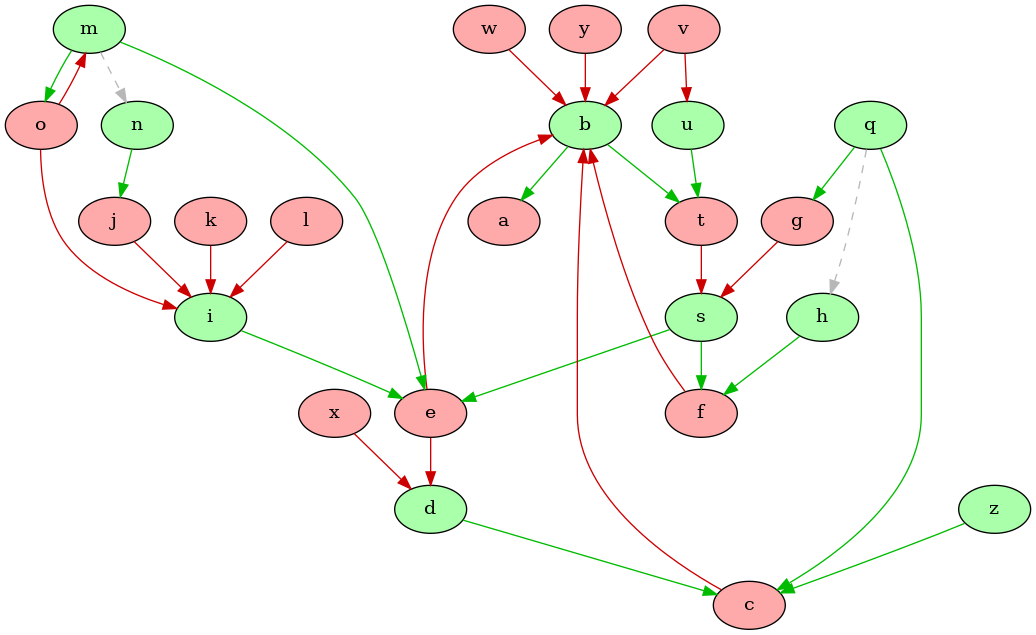

In [17]:
Image("output/game_graph_colored.png")

## Section 4: Argumentation

### 4.1 Argumentation Graph

So what about the attack graph? we can use one rule $attacks(Y, X):- \, edge(X,Y)$ to turn the plain graph into an argumentation graph

In [18]:
%%file files/plain_to_argu.dlv

attacks(Y,X) :- edge(X,Y).

Overwriting files/plain_to_argu.dlv


Different from kernel graph and game graph, we can see that the direction changes for the argumentation graph. So let's generatethe argumentation graph for later usage

In [19]:
change_edge_direction("output/plain_graph.dot", "output_vanilla/plain_graph_reverse.png")

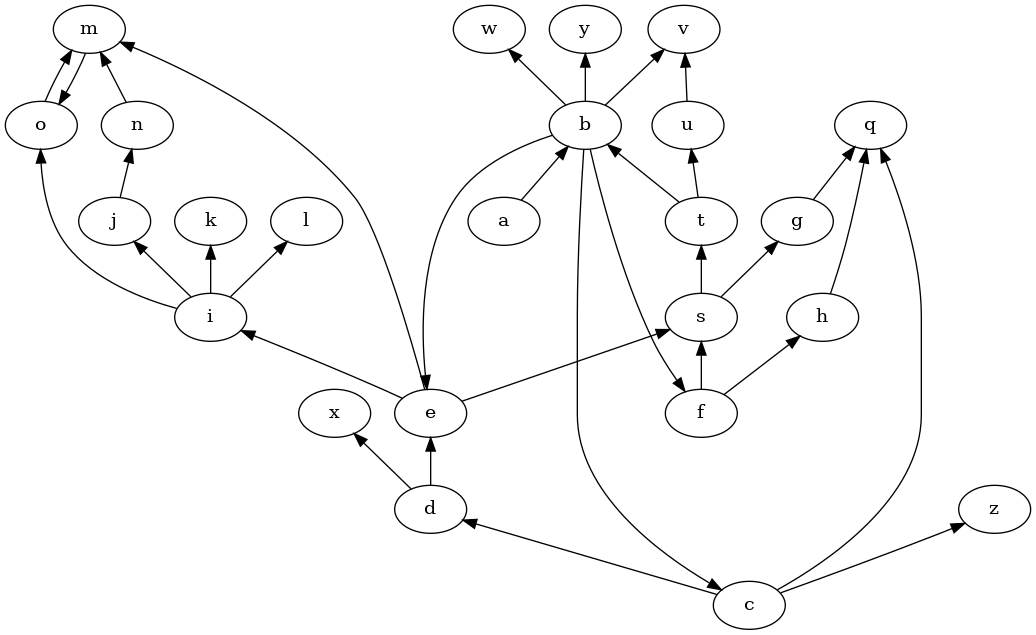

In [20]:
Image("output/plain_graph_reverse.png")

### 4.2 Reason on the Argumentation Graph

Based on the <br>
$\mathsf{defeated}(X) \leftarrow \mathsf{attacks}(Y, X), \neg\, \mathsf{defeated}(Y).$ <br>
$\mathsf{undefeated}(X) ←  ¬ \mathsf{defeated}(X).$ <br>

we can solve this move graph

In [21]:
%%file files/reason_argumentation.dlv

% Positions
pos(X) :- attacks(X,_).
pos(X) :- attacks(_,X).

% Win_Move
defeated(X) :- attacks(Y,X),not defeated(Y).
accepted(X) :- pos(X), not defeated(X).
undefined(X) :- pos(X), not defeated(X), not accepted(X).

Overwriting files/reason_argumentation.dlv


In [22]:
cmd = 'dlv files/plain_graph.dlv files/plain_to_argu.dlv files/reason_argumentation.dlv -wf'
argu_nodes_status = get_nodes_status(run_command(cmd), node_types=["defeated","accepted","undefined"])

In [23]:
argu_nodes_status

{'defeated': ['b', 'u', 'd', 'q', 'z', 's', 'i', 'm', 'h', 'n'],
 'accepted': ['a',
  't',
  'c',
  'e',
  'f',
  'g',
  'j',
  'k',
  'l',
  'o',
  'v',
  'w',
  'x',
  'y'],
 'undefined': []}

### 4.3 Visualization Schema - Game

In [24]:
argu_node_color = {'defeated': 'orange', 'accepted': 'blue', 'undefined': 'yellow'}

In [25]:
argu_edge_color = {
        ('blue', 'blue'): 'gray',
        ('blue', 'yellow'): 'gray',
        ('yellow', 'blue'): 'gray',
        ('yellow', 'yellow'): 'yellow',
        ('blue', 'orange'): 'blue',
        ('orange', 'blue'): 'orange'
    }

### 4.4 Colored Attack(Argumentation) Graph

In [26]:
color_graph("output/plain_graph_reverse.dot","argu", argu_nodes_status, argu_node_color, argu_edge_color)

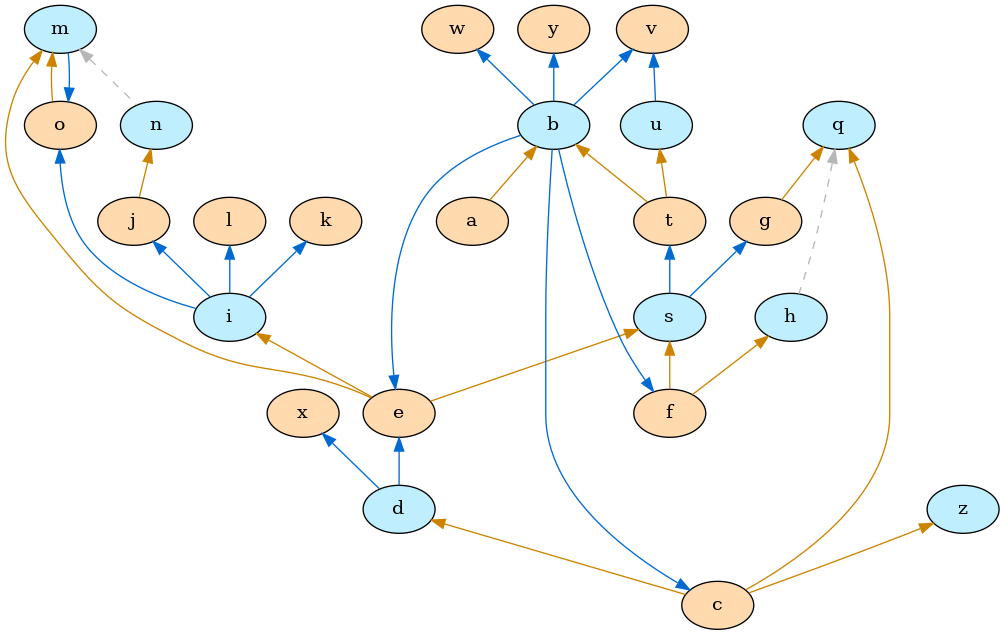

In [27]:
Image("output/argu_graph_colored.png")

## Section 5: Summary

Okie, let's observe colored graphs all in one place

In [28]:
# Function to display selected image
def show_image(img_option):
    img_map = {
        'Kernel Decomposition': 'output/kernel_graph_colored.png',
        'Game': 'output/game_graph_colored.png',
        'Argumentation': 'output/argu_graph_colored.png'
    }
    img_path = img_map[img_option]
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Create radio buttons
radio_buttons = widgets.RadioButtons(
    options=['Kernel Decomposition', 'Game', 'Argumentation'],
    description='Select Image:',
    disabled=False
)

# Create an output widget to capture and display the plots
output = widgets.Output()

# Create an interactive output for the function and radio buttons
interactive_plot = widgets.interactive_output(show_image, {'img_option': radio_buttons})

# Display the widget and the output together using VBox
display(widgets.VBox([radio_buttons, output]))

# Direct the output of the show_image function to the output widget
with output:
    display(interactive_plot)